In [7]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from sklearn.model_selection import train_test_split
%matplotlib inline

In [8]:
df = pd.read_csv('/content/bank_additional_full.csv', delimiter=';', quotechar='"')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [10]:
#f = open('bank-additional-names.txt', "r")
#print(f.read())

**UCI-Bank-Marketing-Dataset**
The following information is drawn from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Abstract The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Set Information The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Attribute information**

***Input variables***

1. *Bank client data*

•	age (numeric)

•	job : type of job (categorical)

•	marital : marital status (categorical)

•	education (categorical)

•	default: has credit in default? (categorical)

•	housing: has housing loan? (categorical)

•	loan: has personal loan? (categorical)

2. *Related with the last contact of the current campaign*

•	contact: contact communication type (categorical)

•	month: last contact month of year (categorical)

•	day_of_week: last contact day of the week (categorical)

•	duration: last contact duration, in seconds (numeric)

**Important note:** This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

3. *Other attributes*

•	campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

•	pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

•	previous: number of contacts performed before this campaign and for this client (numeric)

•	poutcome: outcome of the previous marketing campaign (categorical)

4. *Social and economic context attributes*

•	emp.var.rate: employment variation rate - quarterly indicator (numeric)

•	cons.price.idx: consumer price index - monthly indicator (numeric)

•	cons.conf.idx: consumer confidence index - monthly indicator (numeric)

•	euribor3m: euribor 3 month rate - daily indicator (numeric)

•	nr.employed: number of employees - quarterly indicator (numeric)

5. *Output variable (desired target)*

•	y - has the client subscribed a term deposit? (binary: 'yes','no')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
df.shape

(41188, 21)

In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [15]:
#  Replace columns names that have periods (.) with an underscore (_)
new_column_names = df.columns
df.columns = new_column_names.str.replace('.','_')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### EDA

In [16]:
df['y'].value_counts(normalize=True,dropna=False)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

In [17]:
fig = px.histogram(df, x='y', title='Has The Client Subscribed a Term Deposit?',
                   labels={'y': ''}, # To remove x-axis label
                   category_orders={'y': ['no', 'yes']}, # To maintain the order of categories
                   color='y',
                   color_discrete_map={'no': 'red', 'yes': 'green'}, # Customize colors
                   barmode='group')

fig.update_layout(xaxis_title='', yaxis_title='Count',
                  width=800,
                  height=600)

fig.show()

### This dataset contains more no's than yes's, which is presumably typical of the bank marketing subscriber context. This is also an imbalanced dataset, therefore caution should be exercised while examining accruacy, precision, and recall.

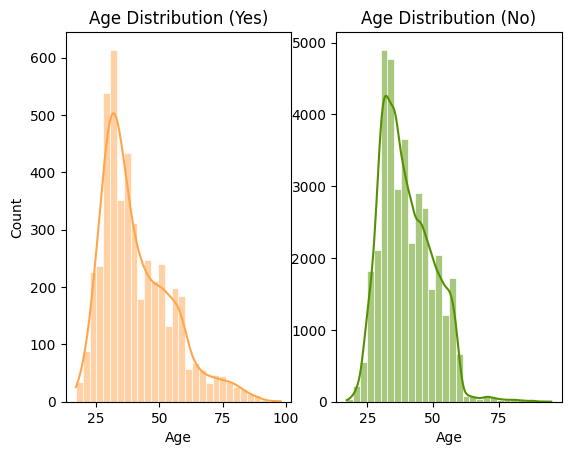

In [18]:
# call histplot on each axes
fig, axes = plt.subplots(1, 2)
plt.style.use('default')

#define figure size
sns.set(rc={"figure.figsize":(8, 4)})

sns.histplot(df.loc[df['y']=='yes']['age'], bins=30, kde = True,color='#ffa54c' , ax=axes[0])
axes[0].set_xlabel("Age", fontsize = 10)
axes[0].set_title('Age Distribution (Yes)')

sns.histplot(df.loc[df['y']=='no']['age'], bins=30, kde = True, color='#539100', ax=axes[1])
axes[1].set_xlabel("Age", fontsize = 10)
axes[1].set_ylabel('')
axes[1].set_title('Age Distribution (No)')

plt.show();

In [19]:
yes_df = df[df['y'] == 'yes']


# Create an interactive boxplot with Plotly
fig = px.box(yes_df, x='age', title='Boxplot of Age for "Yes" Responses')
fig.update_layout(xaxis_title='Age', yaxis_title='Response')
fig.show()

### Job Category

In [20]:
job_categories = df['job'].unique()
job_categories

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

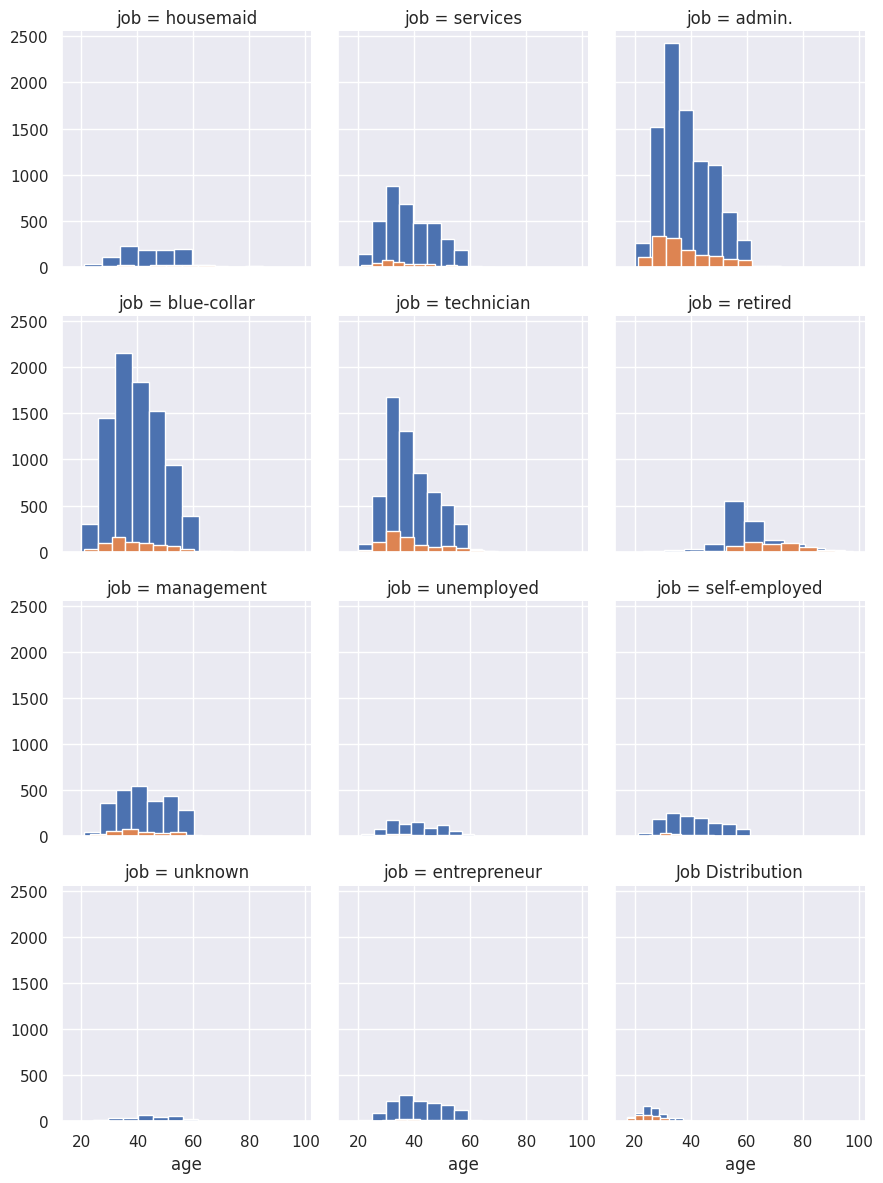

In [21]:
grid_layout = sns.FacetGrid(df, col = 'job', hue='y', col_wrap = 3)
grid_layout.map(plt.hist, 'age')
plt.title('Job Distribution')
plt.show()

In [22]:
yes_data = df[df['y'] == 'yes']

# Create the box plot using Plotly Express
fig = px.box(yes_data, x='age', y='job', color='job', orientation='h', title='Job Occupation Of Those Who Subscribed For The Term Deposit')

# Update the axis labels
fig.update_xaxes(title_text='Age')
fig.update_yaxes(title_text='Job Occupations')

# Show the plot
fig.show()

In [23]:
job_counts = yes_data['job'].value_counts(normalize=True)

# Create a DataFrame with the calculated percentages
job_percentages = pd.DataFrame({
    'Job_Occupation': job_counts.index,
    'percentage': job_counts.values * 100
})

# Sort the DataFrame by percentage in descending order
job_percentages = job_percentages.sort_values(by='percentage', ascending=False)

print(job_percentages)

# Create the bar plot using Plotly Express
fig = px.bar(job_percentages, x='Job_Occupation', y='percentage',
             labels={'Job_Occupation': 'Job Occupation', 'percentage': 'Percentage'},
             title='Percentage of Clients Subscribed Loan Deposit (JOB)',
             color='Job_Occupation')

# Rotate the x-axis labels
fig.update_xaxes(tickangle=40)

# Show the plot
fig.show()

   Job_Occupation  percentage
0          admin.   29.137931
1      technician   15.732759
2     blue-collar   13.750000
3         retired    9.353448
4      management    7.068966
5        services    6.961207
6         student    5.926724
7   self-employed    3.211207
8      unemployed    3.103448
9    entrepreneur    2.672414
10      housemaid    2.284483
11        unknown    0.797414


### Education category

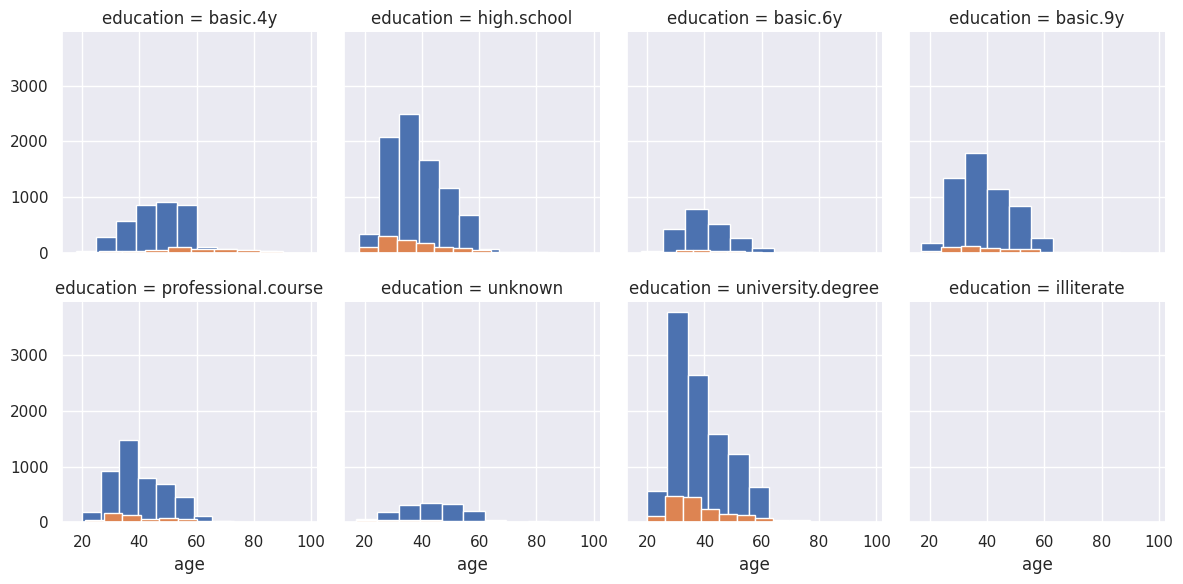

In [24]:
grid_layout = sns.FacetGrid(df, col = 'education', hue='y', col_wrap = 4)
grid_layout.map(plt.hist, 'age');

In [25]:
educ_dict_mapping = {'basic.4y': 'Basic 4year',
                     'high.school': 'High School',
                     'basic.6y': 'Basic 6year',
                     'basic.9y': 'Basic 9year',
                     'professional.course':'Professional Course',
                     'unknown': 'Unknown',
                     'university.degree':'University Degree',
                     'illiterate':'Illiterate'}

df['education'] = df['education'].replace(educ_dict_mapping)
df['education'].unique()

array(['Basic 4year', 'High School', 'Basic 6year', 'Basic 9year',
       'Professional Course', 'Unknown', 'University Degree',
       'Illiterate'], dtype=object)

In [26]:
yes_data = df[df['y'] == 'yes']

# Create the box plot using Plotly Express
fig = px.box(yes_data, x='age', y='education', color='education', orientation='h', title='Age Distribution of Education of those Subscribed Loan Deposit')

# Update the axis labels
fig.update_xaxes(title_text='Age')
fig.update_yaxes(title_text='Education Level')

# Show the plot
fig.show()

### This graph shows that the more education one has, the earlier in life one can receive a subscribed loan deposit. This is most likely attributable to a variety of factors, including income level and savings quantity. Let's also investigate the distribution of each education type among people obtaining a loan.

In [27]:
education_counts = yes_data['education'].value_counts(normalize=True)

# Create a DataFrame with the calculated percentages
education_percentages = pd.DataFrame({
    'education_level': education_counts.index,
    'percentage': education_counts.values * 100
})

# Sort the DataFrame by percentage in descending order
education_percentages = education_percentages.sort_values(by='percentage', ascending=False)

print(education_percentages)

# Create the bar plot using Plotly Express
fig = px.bar(education_percentages, x='education_level', y='percentage',
             labels={'education_level': 'Education Level', 'percentage': 'Percentage'},
             title='Percentage of Clients Subscribed Loan Deposit (Education)',
             color='education_level')

# Rotate the x-axis labels
fig.update_xaxes(tickangle=40)

# Show the plot
fig.show()

       education_level  percentage
0    University Degree   35.991379
1          High School   22.219828
2  Professional Course   12.823276
3          Basic 9year   10.193966
4          Basic 4year    9.224138
5              Unknown    5.409483
6          Basic 6year    4.051724
7           Illiterate    0.086207


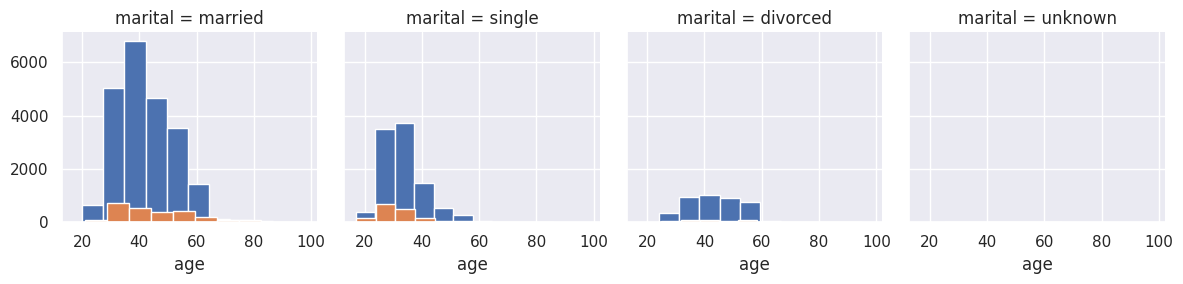

In [28]:
grid_layout = sns.FacetGrid(df, col = 'marital', hue='y', col_wrap = 4)
grid_layout.map(plt.hist, 'age');

### Married individuals subscribed to the term deposit more than individuals with other marital statuses

### Feature Engineering And Selection

### Numerical Features

In [29]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_features = df.select_dtypes(include=numerics).columns.tolist()

# Numerical Features
correlation = df[num_features].corr()
num_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

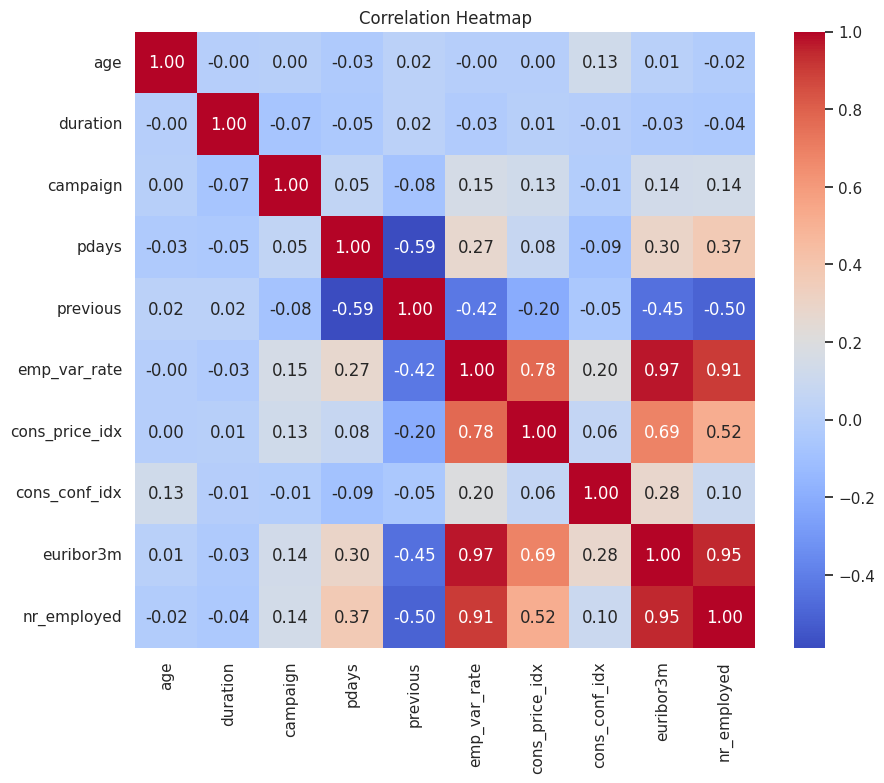

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Definition of some numerical features

• euribor3m: euribor 3 month rate - daily indicator (numeric)

• nr.employed: number of employees - quarterly indicator (numeric)

• emp.var.rate: employment variation rate - quarterly indicator (numeric)

• The correlation between euribor3m and nr_employed is extremely high 94.51%


So is:

• euribor3m - emp_var_rate: 97.2256

• nr_employed - emp_var_rate: 90.60%

• emp_var_rate - cons_price_idx: 77.53%

• cons.price.idx: consumer price index - monthly indicator (numeric)


Which features to keep and which to disregard because of high correlation

### If the correlation between two features is extremely high we will discard one of the features. We want to avoid multicollinearity

In [31]:
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
    for j in range(i+1, correlation.shape[0]):
        if correlation.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False


numerical_selected_columns = correlation.columns[columns]
numerical_selected_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx'],
      dtype='object')

### Categorical Features

In [32]:
objects = ['object','category', 'bool']
cat_features = df.select_dtypes(include=objects).columns.tolist()

# Remove the target varible
cat_features.remove('y')

# Categorical Features
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [33]:
df['job'] = df['job'].str.replace(r'[^\w\s]', '')

df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [34]:
df['poutcome'].value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [35]:
contingency_table_with_margins = pd.crosstab(df['y'], df['job'], margins=True, margins_name='Total')
contingency_table_with_margins

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,Total
y,,,,,,,,,,,,,
no,9070,8616,1332,954,2596,1286,1272,3646,600,6013,870,293,36548
yes,1352,638,124,106,328,434,149,323,275,730,144,37,4640
Total,10422,9254,1456,1060,2924,1720,1421,3969,875,6743,1014,330,41188


In [36]:
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

### Preprocessing the data

In [37]:
# Preprocessing
#--------------------------------
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [38]:
# From preprocessed numerical features remove duration
num_features = numerical_selected_columns.tolist()#.remove('duration')

num_features.remove('duration')

# This transformer replaces the NaN values with a specified placeholder.
# If “constant”, then replace missing values with fill_value.
num_pipeline = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy="constant")),
    ('std_scaler', StandardScaler()),
])

# Categorical Features
cat_features = cat_features

cat_pipeline = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

In [ ]:
# Amey - Random Forest, Decision Tree

### Creating the dataset

In [39]:
features = num_features + cat_features
X = df[features]
y = df["y"]

In [44]:
X.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,1,999,0,1.1,93.994,-36.4,housemaid,married,Basic 4year,no,no,no,telephone,may,mon,nonexistent
1,57,1,999,0,1.1,93.994,-36.4,services,married,High School,unknown,no,no,telephone,may,mon,nonexistent
2,37,1,999,0,1.1,93.994,-36.4,services,married,High School,no,yes,no,telephone,may,mon,nonexistent
3,40,1,999,0,1.1,93.994,-36.4,admin.,married,Basic 6year,no,no,no,telephone,may,mon,nonexistent
4,56,1,999,0,1.1,93.994,-36.4,services,married,High School,no,no,yes,telephone,may,mon,nonexistent


In [46]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [49]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply the label encoder to each categorical feature
for column in cat_features:
    X[column] = label_encoder.fit_transform(X[column])

# Print the transformed data
print(X.head())


   age  campaign  pdays  previous  emp_var_rate  cons_price_idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   
3   40         1    999         0           1.1          93.994   
4   56         1    999         0           1.1          93.994   

   cons_conf_idx  job  marital  education  default  housing  loan  contact  \
0          -36.4    3        1          0        0        0     0        1   
1          -36.4    7        1          3        1        0     0        1   
2          -36.4    7        1          3        0        2     0        1   
3          -36.4    0        1          1        0        0     0        1   
4          -36.4    7        1          3        0        0     2        1   

   month  day_of_week  poutcome  
0      6            1         1  
1      6            1         1  
2      6            1     

<ipython-input-49-4000f8e6db10>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-4000f8e6db10>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-4000f8e6db10>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-4000

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the training and testing sets
print("Training set shape (X_train):", X_train.shape)
print("Training set shape (y_train):", y_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Testing set shape (y_test):", y_test.shape)

Training set shape (X_train): (32950, 17)
Training set shape (y_train): (32950,)
Testing set shape (X_test): (8238, 17)
Testing set shape (y_test): (8238,)


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Instantiate the RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Fit the model to the training set
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Print the accuracy score
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.91      0.97      0.94      7303
         yes       0.52      0.28      0.37       935

    accuracy                           0.89      8238
   macro avg       0.72      0.62      0.65      8238
weighted avg       0.87      0.89      0.87      8238

[[7056  247]
 [ 670  265]]
0.8886865744112649


In [52]:
from sklearn.tree import DecisionTreeClassifier

# Create a DecisionTreeClassifier object
dtc = DecisionTreeClassifier(random_state=42)

# Fit the model to the training set
dtc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dtc = dtc.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_dtc))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_dtc))

# Print the accuracy score
print(accuracy_score(y_test, y_pred_dtc))


              precision    recall  f1-score   support

          no       0.91      0.90      0.91      7303
         yes       0.30      0.34      0.32       935

    accuracy                           0.83      8238
   macro avg       0.61      0.62      0.61      8238
weighted avg       0.84      0.83      0.84      8238

[[6549  754]
 [ 613  322]]
0.8340616654527798
